In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

import scipy.stats as stats

<function scipy.stats._entropy.entropy(pk: 'np.typing.ArrayLike', qk: 'np.typing.ArrayLike | None' = None, base: 'float | None' = None, axis: 'int' = 0) -> 'np.number | np.ndarray'>

In [2]:
df = pd.read_csv('./../data/SteelPlant.csv')
df.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19219 entries, 0 to 19218
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     19219 non-null  int64  
 1   X_Minimum              19219 non-null  int64  
 2   X_Maximum              19219 non-null  int64  
 3   Y_Minimum              19219 non-null  int64  
 4   Y_Maximum              19219 non-null  int64  
 5   Pixels_Areas           19219 non-null  int64  
 6   X_Perimeter            19219 non-null  int64  
 7   Y_Perimeter            19219 non-null  int64  
 8   Sum_of_Luminosity      19219 non-null  int64  
 9   Minimum_of_Luminosity  19219 non-null  int64  
 10  Maximum_of_Luminosity  19219 non-null  int64  
 11  Length_of_Conveyer     19219 non-null  int64  
 12  TypeOfSteel_A300       19219 non-null  int64  
 13  TypeOfSteel_A400       19219 non-null  int64  
 14  Steel_Plate_Thickness  19219 non-null  int64  
 15  Ed

In [5]:
df['Other_Faults'].value_counts()

Other_Faults
0    12661
1     6558
Name: count, dtype: int64

In [5]:
# unbalcanced data

In [4]:
fault_types = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
df[fault_types].nunique()

Pastry          2
Z_Scratch       2
K_Scatch        2
Stains          2
Dirtiness       2
Bumps           2
Other_Faults    2
dtype: int64

In [5]:
df[fault_types].head(10)

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1
5,0,0,0,0,0,0,1
6,0,0,0,0,0,1,0
7,1,0,0,0,0,0,0
8,0,0,0,0,0,0,0
9,0,0,0,0,0,1,0


In [7]:
fault_types = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
df[fault_types].nunique()

Pastry          2
Z_Scratch       2
K_Scatch        2
Stains          2
Dirtiness       2
Bumps           2
Other_Faults    2
dtype: int64

In [9]:
df['Target'] = df[fault_types].idxmax(axis=1)

In [11]:
df['Target'] = df[fault_types].idxmax(axis=1)

In [10]:
df

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,Target
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.0104,0.1417,0,0,0,1,0,0,0,Stains
1,1,808,816,728350,728372,433,20,54,44478,70,...,-0.2997,0.9491,0,0,0,0,0,0,1,Other_Faults
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0944,1.0000,0,0,1,0,0,0,0,K_Scatch
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,-0.0402,0.4025,0,0,1,0,0,0,0,K_Scatch
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,-0.2455,0.9998,0,0,0,0,0,0,1,Other_Faults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,19214,749,757,143210,143219,17,4,4,2193,122,...,0.0044,0.2901,0,0,0,1,0,0,0,Stains
19215,19215,723,735,2488529,2488541,231,17,26,27135,104,...,-0.0989,0.5378,0,0,0,0,0,0,1,Other_Faults
19216,19216,6,31,1578055,1578129,780,114,98,71112,41,...,-0.4283,0.9997,1,0,0,0,0,0,0,Pastry
19217,19217,9,18,1713172,1713184,126,13,26,14808,88,...,-0.1162,0.3509,0,0,0,0,0,0,1,Other_Faults


- Pastry: Small patches or irregularities on the steel plate surface.
- Z_Scratch: Narrow scratches on the surface running parallel to the rolling direction.
- K_Scratch: Scratches similar to Z-scratch but perpendicular to the rolling direction.
- Stains: Discolored areas indicating contamination.
- Dirtiness: Presence of dirt or particulate matter on the surface.
- Bumps: Protruding areas on the surface of the steel plate.
- Other_Faults: A catch-all category for faults not classified elsewhere.

In [23]:
probabilities = df['Target'].value_counts(normalize=True)

def calc_entropy(probabilities):
    return -np.sum(np.log2(probabilities) * probabilities)

# root node entropy
calc_entropy(probabilities)

2.364097425566414

In [24]:
# Calculate the probability of each category
probabilities = df['Target'].value_counts(normalize=True)
# Calculate entropy using the formula
entropy = -np.sum(probabilities * np.log2(probabilities))
entropy

2.364097425566414

In [25]:
import numpy as np

fault_types = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
df['Target'] = df[fault_types].idxmax(axis=1)

# Function to calculate entropy
def entropy_calc(y):
    p = y.value_counts(normalize=True).to_numpy()
    entropies = -p * np.log2(p)  # Using log base 2 for entropy calculation
    return round(np.sum(entropies), 2)

# Calculate root entropy
root_entropy = entropy_calc(df['Target'])
print(f"The root entropy is: {root_entropy}")

The root entropy is: 2.36


Text(0.5, 1.0, 'differnet fault types')

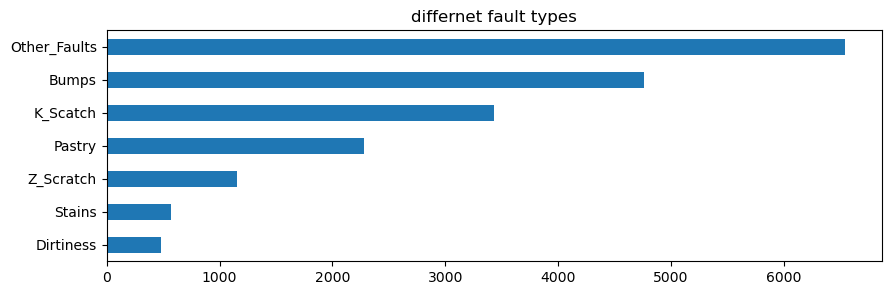

In [31]:
plt.figure(figsize=(10, 3))
df['Target'].value_counts()[::-1].plot(kind='barh')
plt.title('differnet fault types')

In [42]:
X = df[['Pixels_Areas', 'SigmoidOfAreas']]
y = df.Target
X_train, X_test, y_train, y_test = train_test_split(X, y)
clf = DecisionTreeClassifier(max_depth=3 , random_state=42, criterion='gini')
clf.fit(X_train, y_train)
clf.feature_importances_
clf.feature_names_in_

array(['Pixels_Areas', 'SigmoidOfAreas'], dtype=object)

In [46]:
pd.DataFrame({'feature_importances_': clf.feature_importances_, 'feature_names_in_': clf.feature_names_in_})

,feature_importances_,feature_names_in_
0,0.978268,Pixels_Areas
1,0.021732,SigmoidOfAreas


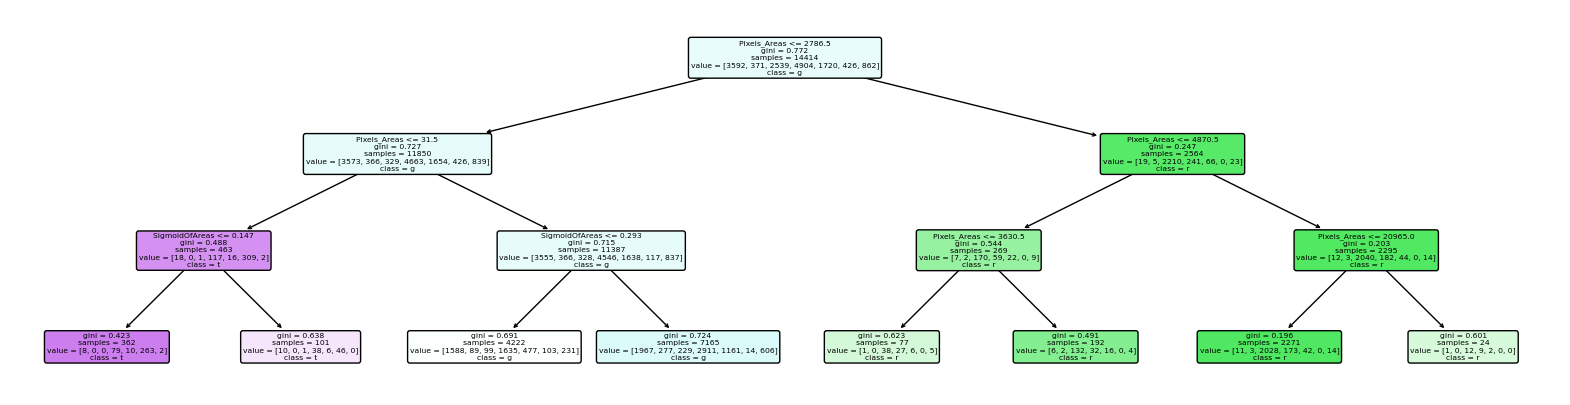

In [48]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 5))
tree.plot_tree(clf, feature_names=X.columns, class_names='Target', filled=True, rounded=True)
plt.show()

In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape) 

(14414, 2)
(4805, 2)
(14414,)
(4805,)


In [18]:
from sklearn.tree import plot_tree

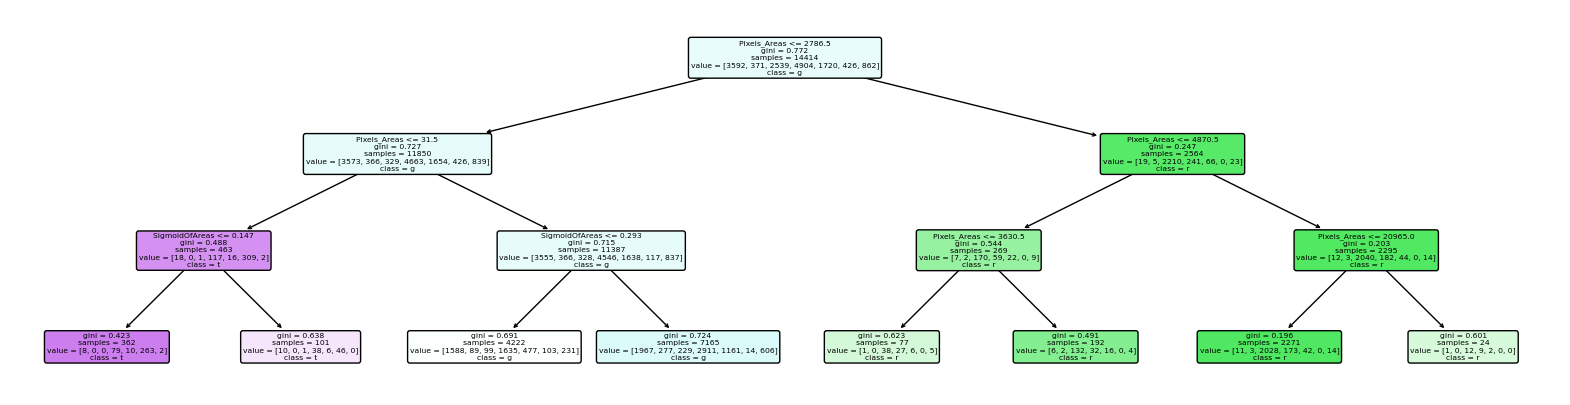

In [49]:
clf = DecisionTreeClassifier(max_depth=3, criterion='gini')
clf.fit(X_train, y_train) 
plt.figure(figsize=(20, 5))
tree.plot_tree(clf, feature_names=X.columns, class_names='Target', filled=True, rounded=True)
plt.show()

In [53]:
def cal_gini(p_purple=1, p_yellow=1):
    return 1 - (p_purple**2 + p_yellow **2)

cal_gini()


-1

In [66]:
# parent
n_samples_p = 10
p_p = 5/n_samples_p
p_y = 5/n_samples_p
parent_gini = cal_gini(p_purple = p_p, p_yellow=p_y)
parent_gini

# left 
n_samples_l = 4
p_p = 4/n_samples_l
p_y = 0/n_samples_l
left_gini = cal_gini(p_purple = p_p, p_yellow=p_y)

# right
n_samples_r = 6
p_p = 1/n_samples_r
p_y = 5/n_samples_r
right_gini = cal_gini(p_purple = p_p, p_yellow=p_y)

parent_gini, left_gini, right_gini
chid_gini = (n_samples_l / n_samples_p) * left_gini + (n_samples_r / n_samples_p)* right_gini
IG = parent_gini - chid_gini
chid_gini, IG

(0.1666666666666666, 0.33333333333333337)

In [71]:
cal_gini(p_purple=0.0, p_yellow=1)

0.0

In [20]:
def gini_cal(p_p=1, p_y=1):    
    return np.round(1 - np.sum(np.array([p_p, p_y])**2), 2)

gini_cal()

-1

In [21]:
purple = 5 
yellow = 5 

In [22]:
n_samples = 10
p_p = 5/n_samples
p_y = 5/n_samples

p_gini = gini_cal( p_p = p_p, p_y = p_y)
p_gini

0.5

In [23]:
# left
n_samples = 4
p_p = 4/n_samples
p_y = 0/n_samples

left_gini = gini_cal( p_p = p_p, p_y = p_y)
left_gini

0.0

In [24]:
# right 

n_samples = 6
p_p = 1/n_samples
p_y = 5/n_samples

right_gini = gini_cal( p_p = p_p, p_y = p_y)
right_gini

0.28

In [25]:
wtGiniIndex = (left_gini  * 4/10) + (right_gini* 6/10)
wtGiniIndex

0.168

In [26]:
p_gini - wtGiniIndex

0.33199999999999996

In [27]:
## parent
n_samples = 5
p_c = 4/n_samples
p_r = 1/n_samples

p_gini = gini_cal( p_p = p_c, p_y = p_r)
p_gini

0.32

In [28]:
## left
n_samples = 2
p_c = 1/n_samples
p_r = 1/n_samples

left_gini = gini_cal( p_p = p_c, p_y = p_r)
left_gini

0.5

In [29]:
## left
n_samples = 3
p_c = 3/n_samples
p_r = 0/n_samples

right_gini = gini_cal( p_p = p_c, p_y = p_r)
right_gini

0.0

In [30]:
wtGiniIndex = (left_gini  * 2/5) + (right_gini* 3/5)
wtGiniIndex

0.2

### Q2. Most Misclassified DT

In [31]:
df = pd.read_csv('./../data/SteelPlant.csv')
df.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1


In [34]:
fault_types = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

In [35]:
df['Target'] = df[fault_types].idxmax(axis=1)

In [36]:
df

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,Target
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.0104,0.1417,0,0,0,1,0,0,0,Stains
1,1,808,816,728350,728372,433,20,54,44478,70,...,-0.2997,0.9491,0,0,0,0,0,0,1,Other_Faults
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0944,1.0000,0,0,1,0,0,0,0,K_Scatch
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,-0.0402,0.4025,0,0,1,0,0,0,0,K_Scatch
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,-0.2455,0.9998,0,0,0,0,0,0,1,Other_Faults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,19214,749,757,143210,143219,17,4,4,2193,122,...,0.0044,0.2901,0,0,0,1,0,0,0,Stains
19215,19215,723,735,2488529,2488541,231,17,26,27135,104,...,-0.0989,0.5378,0,0,0,0,0,0,1,Other_Faults
19216,19216,6,31,1578055,1578129,780,114,98,71112,41,...,-0.4283,0.9997,1,0,0,0,0,0,0,Pastry
19217,19217,9,18,1713172,1713184,126,13,26,14808,88,...,-0.1162,0.3509,0,0,0,0,0,0,1,Other_Faults


In [37]:
df = df.drop(columns=fault_types)

In [38]:
X = df.loc[:, df.columns != 'Target']
y = df.loc[:, 'Target']

In [39]:
X.shape, y.shape

((19219, 28), (19219,))

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y , random_state=42)

In [41]:
for val in [X_train, X_test, y_train, y_test]:
    print(val.shape)

(14414, 28)
(4805, 28)
(14414,)
(4805,)


In [42]:
# Train a decision tree classifier with class weights
clf = DecisionTreeClassifier(criterion = 'entropy',  class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       random_state=42)

In [43]:
y_pred = clf.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

       Bumps       0.39      0.39      0.39      1178
   Dirtiness       0.18      0.14      0.16       133
    K_Scatch       0.83      0.83      0.83       853
Other_Faults       0.39      0.41      0.40      1622
      Pastry       0.21      0.22      0.22       583
      Stains       0.65      0.62      0.63       136
   Z_Scratch       0.44      0.40      0.42       300

    accuracy                           0.45      4805
   macro avg       0.44      0.43      0.44      4805
weighted avg       0.45      0.45      0.45      4805



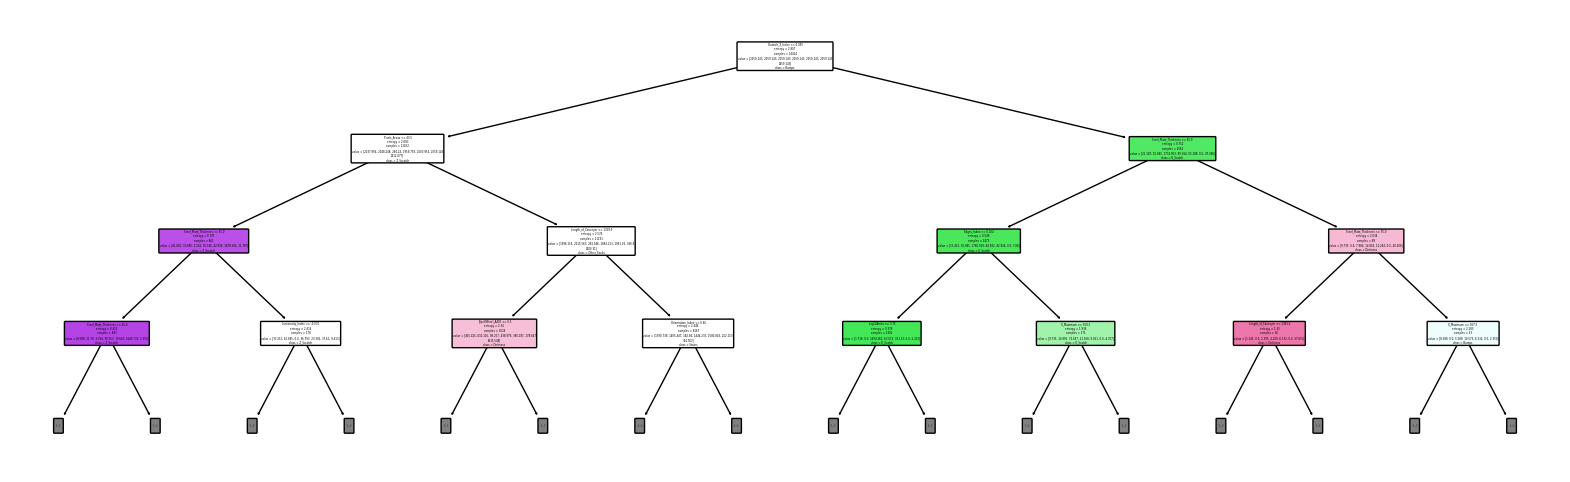

In [44]:
plt.figure(figsize=(20, 6))
tree.plot_tree(clf, feature_names=X.columns, class_names=df['Target'].unique(), filled=True, rounded=True, max_depth = 3)
# Save the plot as a high-resolution PNG file
plt.savefig("decision_tree_plot.png", dpi=300, bbox_inches='tight')
plt.show()


# Q5. Optimizing Decision Tree Depth

In [56]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
from sklearn.model_selection import cross_validate

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y , random_state=42)

In [57]:
tree_depths = [1, 2, 3, 5, 7, 11, 13, 15, 19, 20, 25, 30] 
scores_training = []
scores_validation = []
for depth in tree_depths:
    model = DecisionTreeClassifier(random_state=42, max_depth=depth, class_weight='balanced')
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    cv_acc_results = cross_validate(model, X_train, y_train, cv=kfold, scoring='accuracy', return_train_score=True)
    
    print(f"K-Fold for depth: {depth} - Accuracy Mean: Train: {cv_acc_results['train_score'].mean() * 100:.2f}%, Validation: {cv_acc_results['test_score'].mean() * 100:.2f}%")
    print(f"K-Fold for depth: {depth} - Accuracy Std: Train: {cv_acc_results['train_score'].std() * 100:.2f}%, Validation: {cv_acc_results['test_score'].std() * 100:.2f}%")
    print('***************')

    scores_training.append(cv_acc_results['train_score'].mean())
    scores_validation.append(cv_acc_results['test_score'].mean())
    

K-Fold for depth: 1 - Accuracy Mean: Train: 18.28%, Validation: 18.25%
K-Fold for depth: 1 - Accuracy Std: Train: 0.13%, Validation: 1.14%
***************
K-Fold for depth: 2 - Accuracy Mean: Train: 21.02%, Validation: 20.76%
K-Fold for depth: 2 - Accuracy Std: Train: 1.43%, Validation: 1.32%
***************
K-Fold for depth: 3 - Accuracy Mean: Train: 42.29%, Validation: 42.19%
K-Fold for depth: 3 - Accuracy Std: Train: 0.32%, Validation: 1.25%
***************
K-Fold for depth: 5 - Accuracy Mean: Train: 50.11%, Validation: 49.67%
K-Fold for depth: 5 - Accuracy Std: Train: 1.49%, Validation: 1.45%
***************
K-Fold for depth: 7 - Accuracy Mean: Train: 46.70%, Validation: 44.65%
K-Fold for depth: 7 - Accuracy Std: Train: 0.83%, Validation: 1.41%
***************
K-Fold for depth: 11 - Accuracy Mean: Train: 57.57%, Validation: 46.70%
K-Fold for depth: 11 - Accuracy Std: Train: 0.65%, Validation: 0.88%
***************
K-Fold for depth: 13 - Accuracy Mean: Train: 65.73%, Validation: 48.

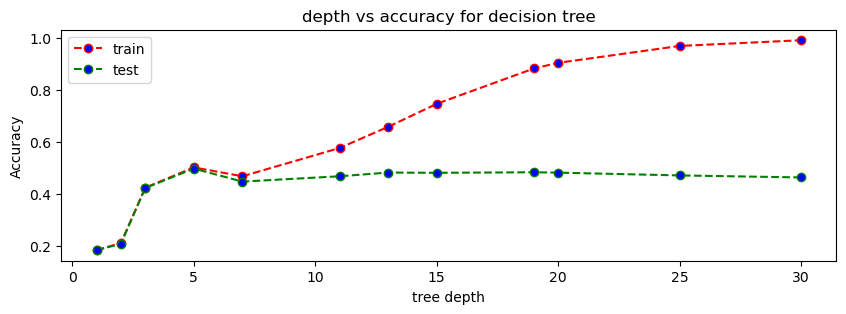

In [59]:
plt.figure(figsize=(10, 3))
plt.plot(tree_depths, scores_training, color='red', linestyle='dashed', marker='o',markerfacecolor='blue', label='train')
plt.plot(tree_depths, scores_validation, color='green', linestyle='dashed', marker='o',markerfacecolor='blue', label='test')
plt.title('depth vs accuracy for decision tree')
plt.xlabel('tree depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [60]:
best_tree_clf = DecisionTreeClassifier(random_state=42, max_depth=5, class_weight='balanced')
best_tree_clf.fit(X_train, y_train)
y_pred = best_tree_clf.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

       Bumps       0.52      0.45      0.48      1366
   Dirtiness       0.47      0.12      0.19       419
    K_Scatch       0.87      0.91      0.89       814
Other_Faults       0.36      0.44      0.40      1352
      Pastry       0.16      0.32      0.21       304
      Stains       0.79      0.61      0.69       169
   Z_Scratch       0.66      0.48      0.55       381

    accuracy                           0.50      4805
   macro avg       0.55      0.47      0.49      4805
weighted avg       0.53      0.50      0.50      4805



In [61]:
feature_imp = pd.DataFrame({'feature_imp':best_tree_clf.feature_importances_, 'feature_name': best_tree_clf.feature_names_in_})

In [62]:
feature_imp.sort_values('feature_imp', ascending=False).set_index('feature_name')[:10]

,feature_imp
feature_name,
Outside_X_Index,0.319797
Pixels_Areas,0.294860
Length_of_Conveyer,0.125352
TypeOfSteel_A300,0.109240
Orientation_Index,0.071100
Steel_Plate_Thickness,0.059511
Luminosity_Index,0.003524
Edges_Index,0.003512
X_Perimeter,0.002863


Text(0.5, 1.0, 'Feature importance')

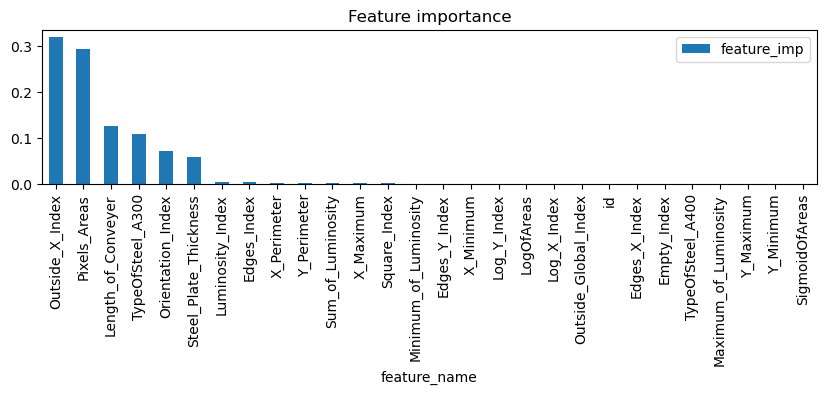

In [63]:
feature_imp.sort_values('feature_imp', ascending=False).set_index('feature_name').plot(kind='bar', figsize=(10, 2))
plt.title('Feature importance')

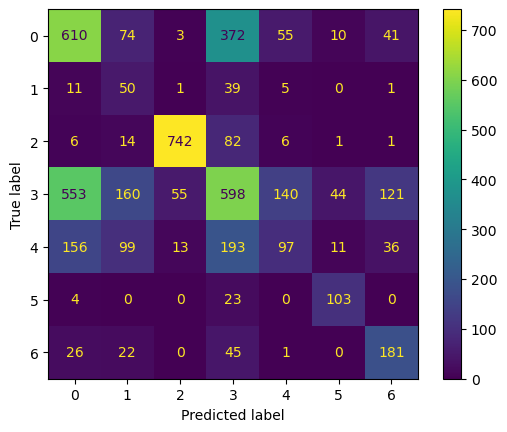

In [64]:
cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cm).plot()

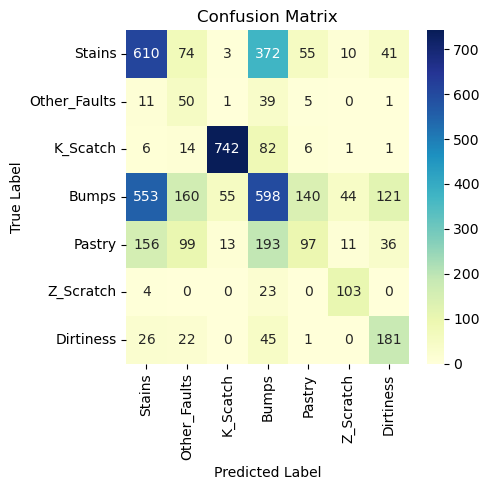

In [65]:
class_names = df.Target.unique()
plt.figure(figsize=(5, 5), tight_layout=True)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',  cbar=True,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [66]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_validate

# Define the list of tree depths you want to evaluate
depths = [3, 5, 7, 11, 13, 15, 19, 20]

# Setup KFold with 10 splits and a fixed random state
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

for depth in depths:
    # Initialize Decision Tree Classifier with the current depth
    tree_clf = DecisionTreeClassifier(max_depth=depth, random_state=42, class_weight='balanced')

    # Perform cross-validation
    cv_acc_results = cross_validate(tree_clf, X_train, y_train, cv=kfold, scoring='accuracy', return_train_score=True)

    # Output the mean and standard deviation of the training and validation scores
    print(f"K-Fold for depth: {depth} - Accuracy Mean: Train: {cv_acc_results['train_score'].mean() * 100:.2f}%, Validation: {cv_acc_results['test_score'].mean() * 100:.2f}%")
    print(f"K-Fold for depth: {depth} - Accuracy Std: Train: {cv_acc_results['train_score'].std() * 100:.2f}%, Validation: {cv_acc_results['test_score'].std() * 100:.2f}%")
    print('***************')

# Testing the best depth on the testing data
best_tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42, class_weight='balanced')
best_tree_clf.fit(X_train, y_train)
print(f"The model accuracy on testing data with best depth is {best_tree_clf.score(X_test, y_test)}")

K-Fold for depth: 3 - Accuracy Mean: Train: 42.29%, Validation: 42.19%
K-Fold for depth: 3 - Accuracy Std: Train: 0.32%, Validation: 1.25%
***************
K-Fold for depth: 5 - Accuracy Mean: Train: 50.11%, Validation: 49.67%
K-Fold for depth: 5 - Accuracy Std: Train: 1.49%, Validation: 1.45%
***************
K-Fold for depth: 7 - Accuracy Mean: Train: 46.70%, Validation: 44.65%
K-Fold for depth: 7 - Accuracy Std: Train: 0.83%, Validation: 1.41%
***************
K-Fold for depth: 11 - Accuracy Mean: Train: 57.57%, Validation: 46.70%
K-Fold for depth: 11 - Accuracy Std: Train: 0.65%, Validation: 0.88%
***************
K-Fold for depth: 13 - Accuracy Mean: Train: 65.73%, Validation: 48.13%
K-Fold for depth: 13 - Accuracy Std: Train: 0.42%, Validation: 1.43%
***************
K-Fold for depth: 15 - Accuracy Mean: Train: 74.58%, Validation: 48.04%
K-Fold for depth: 15 - Accuracy Std: Train: 0.77%, Validation: 1.23%
***************
K-Fold for depth: 19 - Accuracy Mean: Train: 88.18%, Validation:

# Q1. Decision Tree Classification

In [74]:
feature = [0.58,  0.9 , 0.45, 0.18, 0.5,  0.12, 0.31, 0.09, 0.24, 0.83]
label = [1, 0,  0,  0,  0,  0,  1,  0,  1,  1]    

In [79]:
def entropy(s):
    prob = np.bincount(s)/len(s)
    
    return stats.entropy(prob, base=2)

entropy(np.array([1]))


0.0

In [80]:
import numpy as np

def entropy(s):
    prob = np.bincount(s)/len(s)
    return stats.entropy(prob, base=2)

def information_gain(parent, left_child, right_child):
    we_entropy = entropy(left_child)*(len(left_child)/len(parent)) + entropy(right_child)*(len(right_child)/len(parent))
    info_gain = entropy(parent) - we_entropy
    return info_gain
    
def best_split(features,labels):
    best_threshold=None
    best_info_gain = -1
    
    # For every unique value of that feature
    for threshold in np.unique(features):
        
        y_left = labels[np.where(threshold >=  features)]  #list of labels in left child
        y_right = labels[np.where(threshold <  features)]  #list of labels in right child
        
        if len(y_left) > 0 and len(y_right) > 0:
            gain = information_gain(labels, y_left, y_right)                 # Caclulate the information gain and save the split parameters if the current split if better then the previous best

            if gain > best_info_gain:
                best_threshold = threshold
                best_info_gain = gain
    
    return best_threshold

In [76]:
X = np.array([0.58, 0.9, 0.45, 0.18, 0.5, 0.12, 0.31, 0.09, 0.24, 0.83])
y = np.array([1, 0,  0,  0,  0,  0,  1,  0,  1,  1])
best_split(X, y)

0.18

In [77]:
attr1 = np.array([0, 1, 2, 1, 2, 0, 1, 2, 2, 0, 1, 1, 0, 1, 2, 1, 1, 1, 0, 1])
y = np.array([0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0])

In [78]:
y[attr1 == 0]

array([0, 0, 1, 0, 1])